In [1]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# compute the number of labels
num_labels = len(np.unique(y_test))
print(num_labels)

10


In [5]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

In [7]:
# reshape input
x_train = np.reshape(x_train, [-1,input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test, [-1,input_size])
x_test = x_test.astype('float32')/255

In [8]:
x_train.shape

(60000, 784)

In [12]:
x_train[0, 300:400]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.54509807,
       0.99215686, 0.74509805, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04313726, 0.74509805, 0.99215686,
       0.27450982, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [14]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

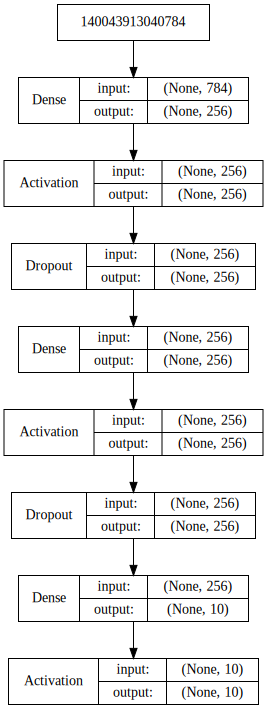

In [15]:
from IPython.display import SVG

from keras.utils.vis_utils import model_to_dot



def plot_keras_model(model,

                     show_shapes=True,

                     show_layer_names=True):

    return SVG(model_to_dot(model,

                            show_shapes=show_shapes,

                            show_layer_names=show_layer_names).create(prog='dot',format='svg'))



plot_keras_model(model, show_shapes=True, show_layer_names=False)

In [16]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# train
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.4272 - acc: 0.8698
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1967 - acc: 0.9415
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1511 - acc: 0.9548
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1297 - acc: 0.9613
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1167 - acc: 0.9646
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1021 - acc: 0.9689
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0949 - acc: 0.9696
Epoch 8/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0875 - acc: 0.9726
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0815 - acc: 0.9749
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0761 - acc: 0.9755

In [18]:
# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 20us/step

Test accuracy: 98.3%
